In [2]:
#y'=6x-4   h=2
h=2
def forQuest(x):
    y=6*x-4
    return y

print(forQuest(h))

8


In [3]:
def lim(f,x,h):
    return (f(x+h)-f(x))/h

def f(x):
    return 3*x**2-4*x

#y=f(x)=3x^2-4x
#f'(x)=lim(f(x+h)-f(x))/h  随着h越来越小 两值差距越来越小

h=0.1
x=1
#求x=1处的f（x)导数
for i in range(10):
    print(f"h={h:.10f},numerical limit={lim(f,x,h):.10f}") #精确小数点后五位
    h*=0.1

h=0.1000000000,numerical limit=2.3000000000
h=0.0100000000,numerical limit=2.0300000000
h=0.0010000000,numerical limit=2.0030000000
h=0.0001000000,numerical limit=2.0003000000
h=0.0000100000,numerical limit=2.0000300000
h=0.0000010000,numerical limit=2.0000030001
h=0.0000001000,numerical limit=2.0000002987
h=0.0000000100,numerical limit=1.9999999878
h=0.0000000010,numerical limit=2.0000001655
h=0.0000000001,numerical limit=2.0000001655


In [4]:
#极限求圆的面积
n=6
h=0.1
r=3
Π=3.1415926
li=[]

for i in range(n):
    area=0.0
    dr=h
    for j in range(int(r/dr)):
        ar=2*Π*h*dr
        area+=ar
        dr+=h
        if i==0:
            li.append(ar)
    print(f"area limit={area:.10f}")
    h*=0.1

print(f"real area={Π*r**2}")
print(li)

area limit=29.2168111800
area limit=28.1800856220
area limit=28.2649086222
area limit=28.2733909222
area limit=28.2742391523
area limit=28.2743239750
real area=28.2743334
[0.06283185200000001, 0.12566370400000001, 0.18849555600000006, 0.25132740800000003, 0.31415926000000005, 0.3769911120000001, 0.43982296400000004, 0.5026548160000001, 0.565486668, 0.62831852, 0.6911503720000001, 0.7539822240000001, 0.8168140760000001, 0.8796459280000002, 0.9424777800000003, 1.0053096320000003, 1.0681414840000005, 1.1309733360000005, 1.1938051880000005, 1.2566370400000004, 1.3194688920000006, 1.3823007440000006, 1.4451325960000008, 1.5079644480000007, 1.570796300000001, 1.6336281520000009, 1.6964600040000009, 1.759291856000001, 1.822123708000001, 1.8849555600000012]


## 画图

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


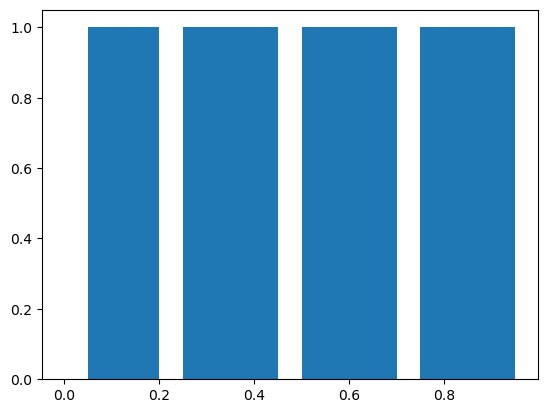

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax = fig.add_subplot()

x_axis=[] #X轴的点
for i in range(0,100,5):
    x_axis.append((i/100))

print(x_axis)

plt.hist(li,x_axis)

plt.show()

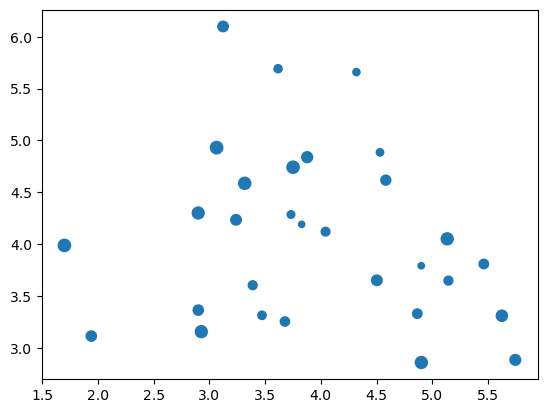

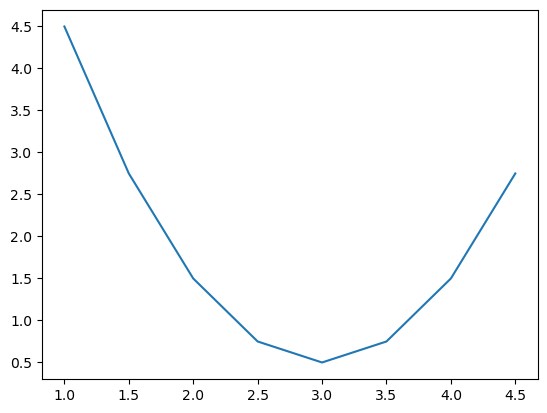

In [6]:
np.random.seed(1) #固定seed
x=4+np.random.normal(0,1,30)
x
y=4+np.random.normal(0,1,len(x))
y

size=np.random.uniform(20,80,len(x)) #在均匀分布[20,80)中随机采样

#plot
fig,ax=plt.subplots()
ax.scatter(x,y,s=size,vmin=0,vmax=100) # s设置散点的大小为 size 散点的大小范围为 [0,100]

fig,ax=plt.subplots() #创建包含单轴的图

def line(x):
    y=(x-3)**2+0.5
    return y

x_axis=[1,1.5,2,2.5,3,3.5,4,4.5] #X轴的点
ep1=[1,1.3,1.5,2.2,2.6,3.1,4.5,5]
ep2=[]
for i in x_axis:
    ep2.append(line(i))
    
ax.plot(x_axis,ep2) #图上画一些点并连接 折线图
plt.show() #输出画布

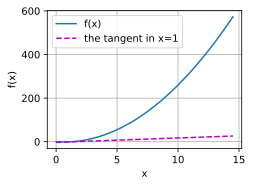

In [11]:
from matplotlib_inline import backend_inline

#设置svg格式绘制图表
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    """设置图表的大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    """设置坐标轴的属性"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()
    
#绘制任意方程对应的曲线及其在指定位置的切线   
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,
        xscale='linear',yscale='linear',fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else plt.gca()
    
    #如果X有一个轴，则输出True
    def has_one_axis(X):
        return (hasattr(X,'ndim') and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X,Y = [[]] * len(X),X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    
    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y,fmt)
            
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)
    
x=np.arange(0,15,0.5)
plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','the tangent in x=1'])

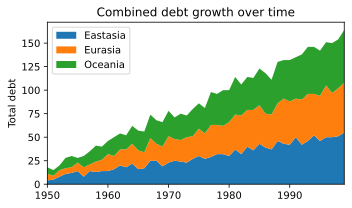

In [8]:
>>> rng = np.arange(50)
>>> rnd = np.random.randint(0, 10, size=(3, rng.size))
>>> yrs = 1950 + rng

>>> fig, ax = plt.subplots(figsize=(5, 3))
>>> ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
>>> ax.set_title('Combined debt growth over time')
>>> ax.legend(loc='upper left')
>>> ax.set_ylabel('Total debt')
>>> ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
>>> fig.tight_layout()

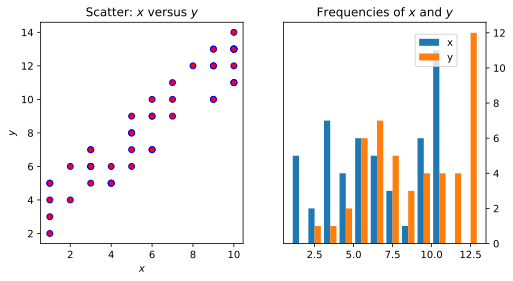

In [9]:
>>> x = np.random.randint(low=1, high=11, size=50)
>>> y = x + np.random.randint(1, 5, size=x.size)
>>> data = np.column_stack((x, y))

>>> fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

>>> ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
>>> ax1.set_title('Scatter: $x$ versus $y$')
>>> ax1.set_xlabel('$x$')
>>> ax1.set_ylabel('$y$')

>>> ax2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y'))
>>> ax2.legend(loc=(0.65, 0.8))
>>> ax2.set_title('Frequencies of $x$ and $y$')
>>> ax2.yaxis.tick_right()